# Notebook to analyze Scielo Data

In [1]:
# Boring but neccesary imports
%matplotlib inline
import matplotlib.pyplot as plt
import ingest_data 
import analyze
import networkx as nx

## Ingest the data into a data frame using the library

In [2]:
df = ingest_data.ingest_wos_scielo_folder()
print('Number of records ingested: ',len(df))

Encoding:  UTF-8-SIG
Number of records ingested:  15483


## Now unpack the data frame into dictionaries (authors, papers, institutions)
The output corresponds to fields with insufficient information to extract a country.
(tdl)This probably should go to a log file.

In [3]:
authors, papers, institutions = ingest_data.get_scielo_dicts(df)

--- Logging error ---
Traceback (most recent call last):
  File "/home/gino/anaconda3/lib/python3.7/logging/__init__.py", line 1025, in emit
    msg = self.format(record)
  File "/home/gino/anaconda3/lib/python3.7/logging/__init__.py", line 869, in format
    return fmt.format(record)
  File "/home/gino/anaconda3/lib/python3.7/logging/__init__.py", line 608, in format
    record.message = record.getMessage()
  File "/home/gino/anaconda3/lib/python3.7/logging/__init__.py", line 369, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/gino/anaconda3/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/gino/anaconda3/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/gino/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/gino/anaconda3/lib/python3.7/site-

0


In [4]:
len(institutions)

7001

In [5]:
inst_list=sorted(list(institutions.keys()))

In [49]:
inst_list[300:400]

['CIRN-INTA',
 'CITEDEF',
 'CLASP',
 'CLIA',
 'CMPC Celulose Riograndense',
 'CNPAF',
 'CNPq',
 'CNR',
 'CNRS',
 'CNS',
 'CO',
 'COAMO',
 'COAMO Agroindustrial Cooperativa',
 'COFB',
 'COLPOS',
 'COLUMBIA UNIVERSITY',
 'CONACYT-UAT',
 'CONAMED',
 'CONICEF',
 'CONICET',
 'CONICET - UBA',
 'CONICET Universidad Nacional de Córdoba',
 'CONICET Universidad Nacional del Comahue',
 'CONICET-CNEA',
 'CONICET-Universidad Nacional de Córdoba',
 'CORE Biotechnology-Bioengineering',
 'CORIMEX LTDA.',
 'CORPOICA',
 'CPRL Liceo La Paz',
 'CREA',
 'CRNS',
 'CS Canillejas',
 'CS Colmenar Viejo Norte',
 'CTA',
 'CTS 367 Research Group',
 'CUJAE',
 'Cabildo Gran Canaria',
 'Cabildo de Gran Canaria',
 'Cairo University',
 'Caixa Econômica Federal',
 'Caja Costarricense de Seguro Social',
 'Caja Petrolera de Salud',
 'Calcutta University',
 'California Institute of Technology',
 'California State University',
 'Calle 90 # 5117 entre 51A y 53',
 'Campinas State University',
 'Campinas State University (UNI

In [7]:
papers[list(papers.keys())[0]]

{'title': 'Repercussão da exposição à violência por parceiro íntimo no comportamento dos filhos',
 'authors': ['Durand, Julia Garcia',
  'Schraiber, Lilia Blima',
  'França-Junior, Ivan',
  'Barros, Claudia'],
 'year': 2011,
 'spanish title': "Impact of exposure to intimate partner violence on children's behavior",
 'portuguese title': 'Repercusión de la exposición a la violencia por pareja íntima en el comportamiento de los hijos',
 'other language title': nan,
 'source': 'Revista de Saúde Pública',
 'language': 'Portuguese',
 'english author keywords': ['Student Dropouts',
  'Child Behavior',
  'Parent-Child Relations',
  'Violence Against Women'],
 'institutions': ['Universidade de São Paulo']}

# Usage Examples

## Simple Stats

In [8]:
print('Number of authors: ',len(authors))
print(f'Number of publications: {len(papers):,}')
print(f'Number of institutions: {len(institutions):,}')

Number of authors:  45777
Number of publications: 15,483
Number of institutions: 7,001


In [9]:
country_list = [institutions[inst]['country'] for inst in institutions]
country_list = list(set(country_list))
country_list = sorted(country_list)

print(f'Number of countries: {len(country_list):,}')
print('Country List: ', country_list)

Number of countries: 68
Country List:  ['Angola', 'Argentina', 'Australia', 'Austria', 'Barbados', 'Belgium', 'Bolivia', 'Brazil', 'Bulgaria', 'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Denmark', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Finland', 'France', 'Germany', 'Greece', 'Guatemala', 'Guyana', 'Honduras', 'Hong Kong', 'India', 'Indonesia', 'Iran', 'Iraq', 'Italy', 'Jamaica', 'Japan', 'Lithuania', 'Macedonia', 'Mali', 'Mexico', 'Mozambique', 'Netherlands', 'New Zealand', 'Nicaragua', 'Nigeria', 'No country available', 'Norway', 'Paraguay', 'Peru', 'Poland', 'Portugal', 'Puerto Rico', 'Russia', 'Saudi Arabia', 'Serbia', 'Slovenia', 'South Africa', 'Spain', 'Sri Lanka', 'Sweden', 'Switzerland', 'Turkey', 'USA', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'Uruguay', 'Venezuela', 'Vietnam']


In [10]:
# Create an ordered list of authors and their number of published papers
auth_prod = [(author, len(authors[author]['papers_list']))
             for author in authors]
auth_prod = sorted(auth_prod, key=lambda x: x[1], reverse=True)

<IPython.core.display.Javascript object>


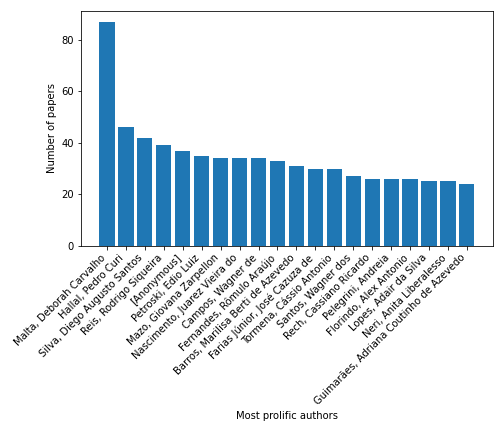

In [48]:
# Visualize the top 10 authors
%matplotlib notebook
n_authors = 20
top_authors = [author for (author,value) in auth_prod[0:n_authors]]
pubs_total  = [value for (author,value) in auth_prod[0:n_authors]]
authors_pos = [ i for i in range(n_authors)]

plt.rcParams['figure.figsize'] = [7, 6]
plt.bar(authors_pos, pubs_total)
plt.xticks(authors_pos, top_authors)
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel('Most prolific authors')
plt.ylabel('Number of papers')
plt.tight_layout()
plt.show()

In [12]:
country_papers = ingest_data.get_country_papers_count(papers, institutions)

In [13]:
# Top countries
country_ranking = [(country, paper_number) for (country, paper_number) in country_papers.items()]
country_ranking = sorted(country_ranking, key=lambda x:x[1], reverse=True)

<IPython.core.display.Javascript object>


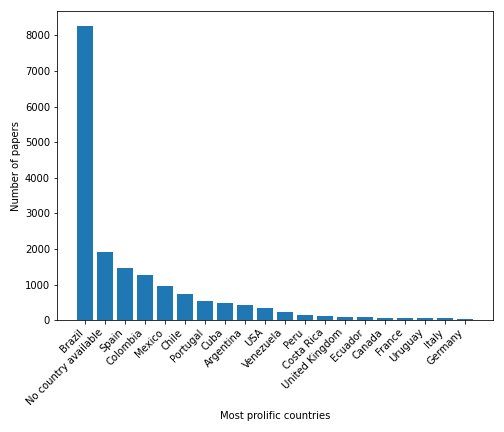

In [21]:
# Visualize the top 20 countries
%matplotlib notebook
n_countries = 20
top_countries = [item[0] for item in country_ranking[0:n_countries]]
pubs_total  =   [item[1]  for item in country_ranking[0:n_countries]]
country_pos = [ i for i in range(n_countries)]

plt.rcParams['figure.figsize'] = [7, 6]
plt.bar(country_pos, pubs_total)
plt.xticks(country_pos, top_countries)
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel('Most prolific countries')
plt.ylabel('Number of papers')
plt.tight_layout()
plt.show()

In [15]:
country_ranking

[('Brazil', 8276),
 ('No country available', 1907),
 ('Spain', 1458),
 ('Colombia', 1263),
 ('Mexico', 950),
 ('Chile', 728),
 ('Portugal', 544),
 ('Cuba', 485),
 ('Argentina', 415),
 ('USA', 337),
 ('Venezuela', 244),
 ('Peru', 142),
 ('Costa Rica', 130),
 ('United Kingdom', 96),
 ('Ecuador', 83),
 ('Canada', 75),
 ('France', 69),
 ('Uruguay', 56),
 ('Italy', 54),
 ('Germany', 36),
 ('Paraguay', 36),
 ('Australia', 32),
 ('Bolivia', 31),
 ('Iran', 26),
 ('Turkey', 21),
 ('China', 21),
 ('Sweden', 17),
 ('Serbia', 15),
 ('India', 14),
 ('Switzerland', 13),
 ('Belgium', 12),
 ('Jamaica', 12),
 ('Denmark', 9),
 ('Japan', 9),
 ('Greece', 8),
 ('Mozambique', 8),
 ('Honduras', 8),
 ('Austria', 7),
 ('Macedonia', 7),
 ('Netherlands', 7),
 ('Croatia', 7),
 ('Poland', 7),
 ('Norway', 7),
 ('Finland', 6),
 ('Russia', 6),
 ('Guatemala', 6),
 ('Lithuania', 5),
 ('Nigeria', 4),
 ('South Africa', 3),
 ('Angola', 3),
 ('Vietnam', 3),
 ('Slovenia', 3),
 ('Nicaragua', 3),
 ('Sri Lanka', 2),
 ('Barbado

In [46]:
G_coauthors = analyze.get_coauthorship_graph(papers, authors, papers_filter=3)

Number of nodes  2458
Number of edges to add:  6859


<IPython.core.display.Javascript object>


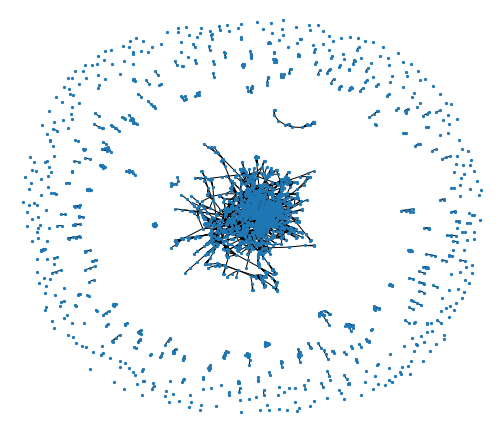

In [47]:
%matplotlib notebook
nx.draw(G_coauthors, with_labels=False, node_size=5)
plt.show()

In [32]:
#                     Upcoming code improvements 
# * Library structure (pip install kind of functionality)